In [5]:
library("readxl")
library("ggplot2")

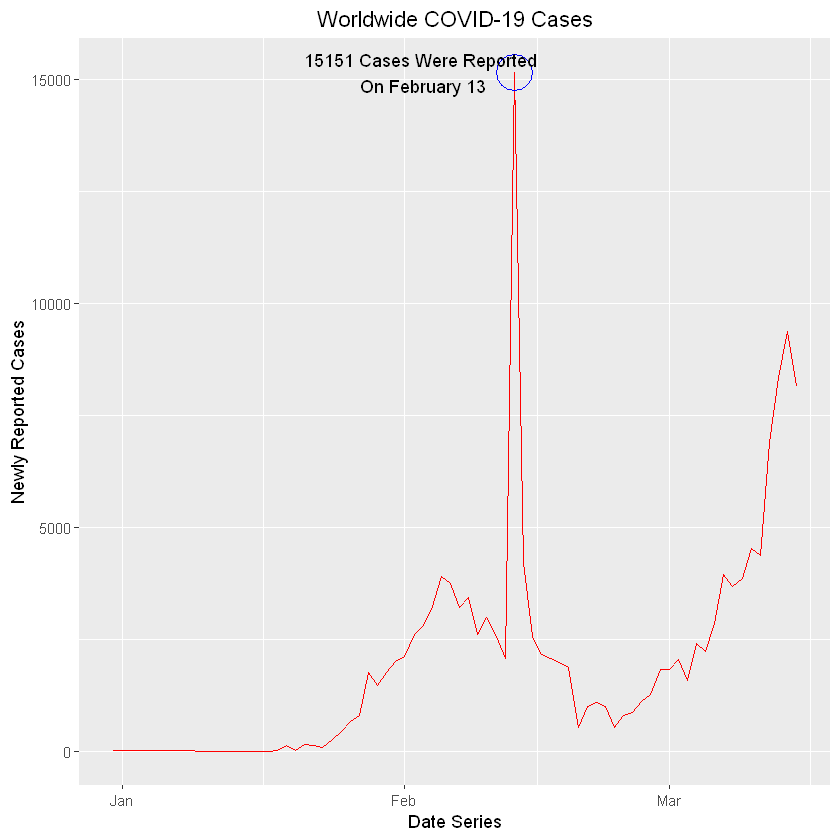

In [3]:
covid<-data.frame(read_excel("C:/Users/avakk/Desktop/COVID-19.xls"))

covid_reports<-covid[covid$NewConfCases!=0,]
covid_reports$DateRep<-as.Date(covid_reports$DateRep)
total_cases_by_date<-data.frame(aggregate(covid_reports$NewConfCases,by=list(covid_reports$DateRep),sum))
covid_report_plot<-ggplot(total_cases_by_date,aes(total_cases_by_date$Group.1,total_cases_by_date$x))+geom_line(color="red")
covid_report_plot+ggtitle("Worldwide COVID-19 Cases")+labs(y="Newly Reported Cases", x = "Date Series")+annotate(geom="point", x=as.Date("2020-02-13"), y=15151, size=10, shape=21, fill="transparent", color="blue")+annotate(geom="text", x=as.Date("2020-02-03"), y=15151, label="15151 Cases Were Reported \nOn February 13")+theme(plot.title = element_text(hjust = 0.5))



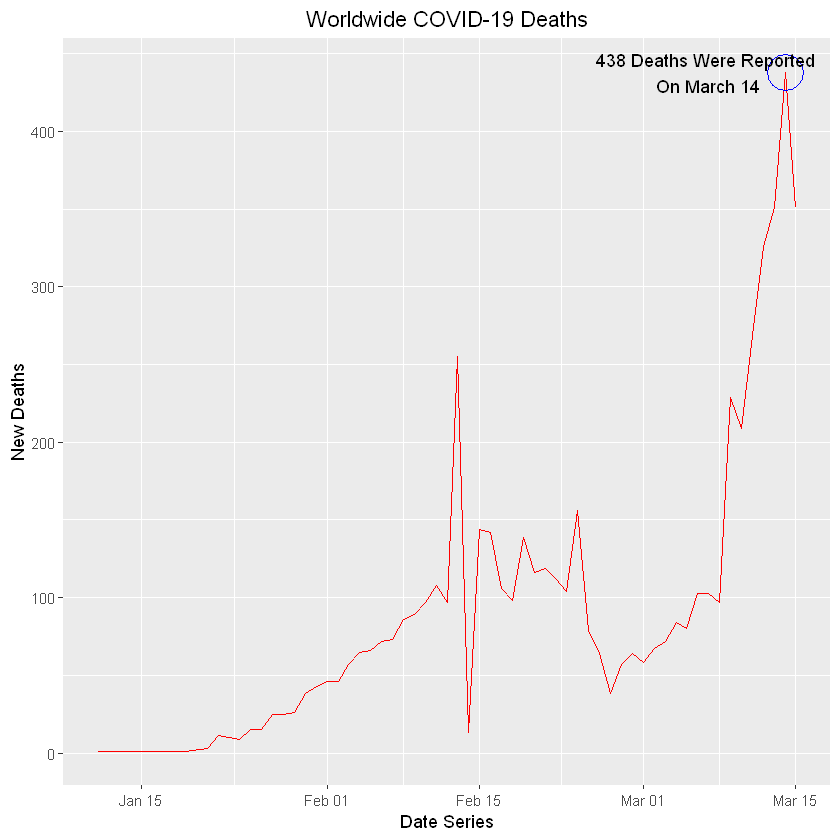

In [4]:
covid_deaths<-covid[covid$NewDeaths!=0,]
covid_deaths$DateRep<-as.Date(covid_deaths$DateRep)
total_deaths_by_date<-data.frame(aggregate(covid_deaths$NewDeaths,by=list(covid_deaths$DateRep),sum))

covid_death_plot<-ggplot(total_deaths_by_date,aes(total_deaths_by_date$Group.1,total_deaths_by_date$x))+geom_line(color="red")
covid_death_plot+ggtitle("Worldwide COVID-19 Deaths")+labs(y="New Deaths", x = "Date Series")+annotate(geom="point", x=as.Date("2020-03-14"), y=438, size=10, shape=21, fill="transparent", color="blue")+annotate(geom="text", x=as.Date("2020-03-07"), y=438, label="438 Deaths Were Reported \nOn March 14")+theme(plot.title = element_text(hjust = 0.5))


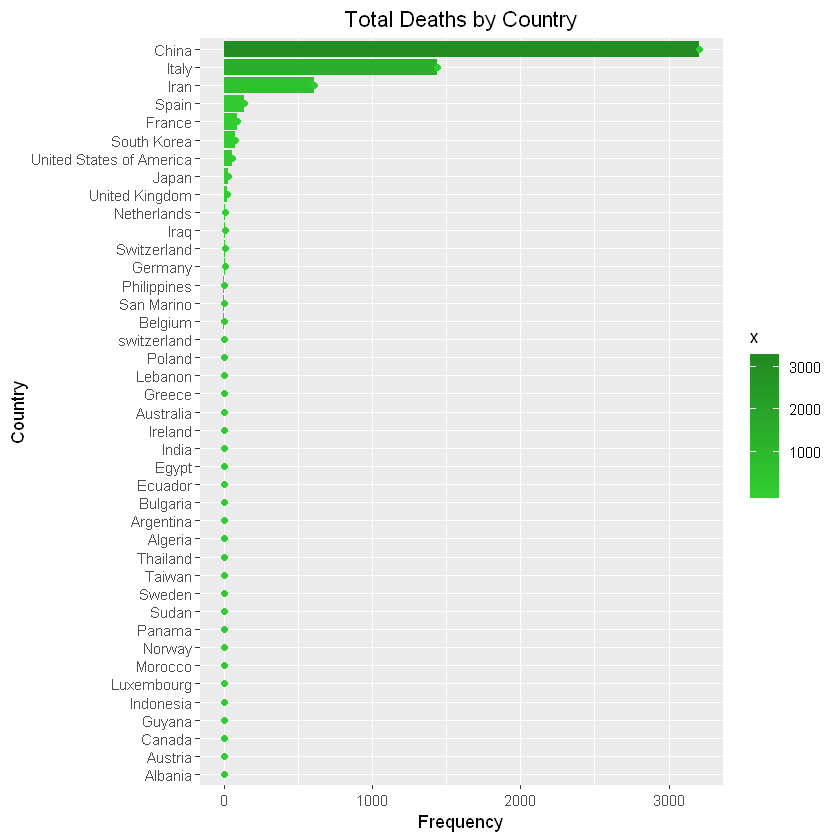

In [11]:
for (i in 1:nrow(covid_deaths))
{
  if(grepl('Cases on an international conveyance Japan',covid_deaths[i,2])){
    covid_deaths[i,2] <- 'Japan'
  }
}
deaths_by_country<-data.frame(aggregate(covid_deaths$NewDeaths,by=list(covid_deaths$CountryExp),sum))

covid_death_by_country_plot<-ggplot(deaths_by_country,aes(y=deaths_by_country$x,x=reorder(deaths_by_country$Group.1,deaths_by_country$x)))+geom_bar(stat="identity")+geom_col(aes(fill = x))+geom_point(color="limegreen") + scale_fill_gradient(low = "limegreen", high = "forestgreen")+coord_flip()
covid_death_by_country_plot+ggtitle("Total Deaths by Country")+labs(x="Country",y="Frequency")+theme(plot.title = element_text(hjust = 0.5)) 
